In [1]:
# imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.losses import Huber
from keras.optimizers import SGD

c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\andrew\

In [37]:
# Note - the csv is taken from yahoo finance.
df = pd.read_csv('BRK-B.csv')

df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,150.539993,150.979996,149.309998,150.429993,150.429993,4460800
2016-09-07,150.000000,150.490005,149.339996,149.580002,149.580002,2437100
2016-09-08,149.600006,150.100006,149.300003,149.779999,149.779999,2750300
2016-09-09,149.100006,149.589996,146.559998,146.619995,146.619995,4342700
2016-09-12,146.369995,149.389999,145.940002,148.970001,148.970001,4323800


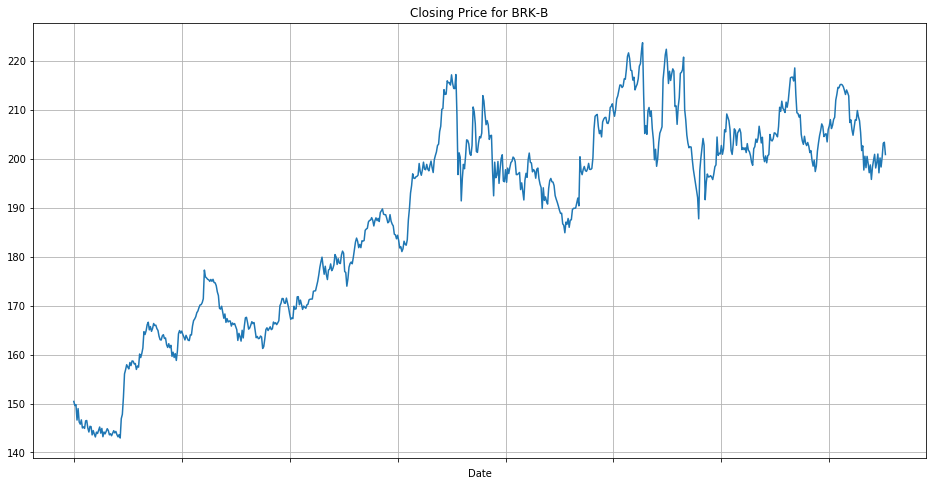

In [3]:
df['Close'].plot(label = 'BRK-B', figsize=(16, 8), title = 'Closing Price for BRK-B', grid = True)

In [4]:
window_size = 27

num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

# never would have guessed te above code

data = df['Close'].values[indices]

In [5]:
X = data[:,:-1]
y = data[:, -1]

In [6]:
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

In [7]:
# Method Ridge Regression

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

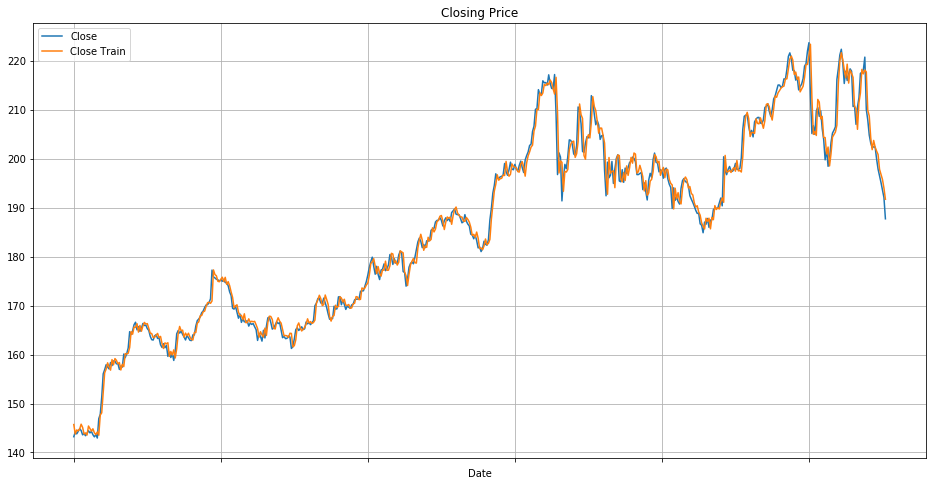

In [8]:
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)
df_ridge = df_ridge.iloc[window_size:ind_split]
df_ridge['Close Train'] = y_pred_train_ridge[:-window_size]
df_ridge.plot(label = 'BRK-B', figsize = (16, 8), title = 'Closing Price', grid = True)

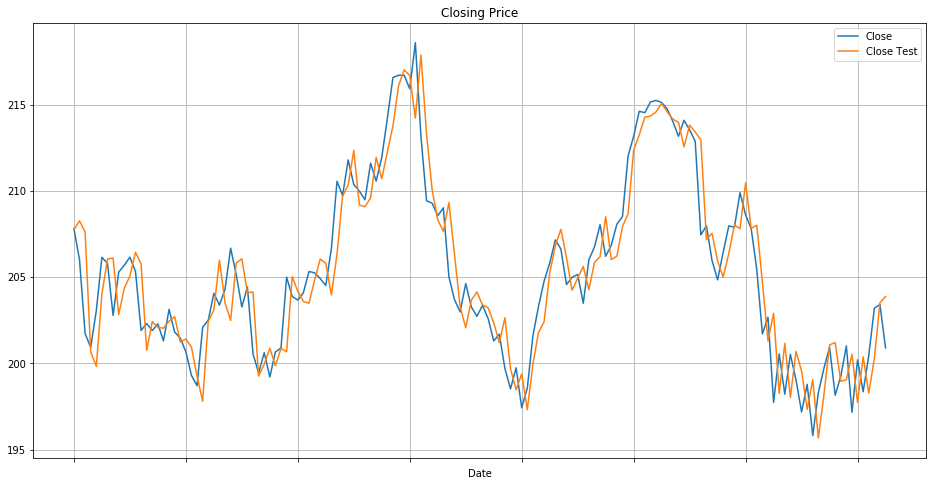

In [9]:
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)
df_ridge = df_ridge.iloc[ind_split + window_size:]
df_ridge['Close Test'] = y_pred_ridge
df_ridge.plot(label = 'BRK-B', figsize = (16, 8), title = 'Closing Price', grid = True)

In [10]:
# Method Gradient Boosting Trees

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

y_pred_train_gb = gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)

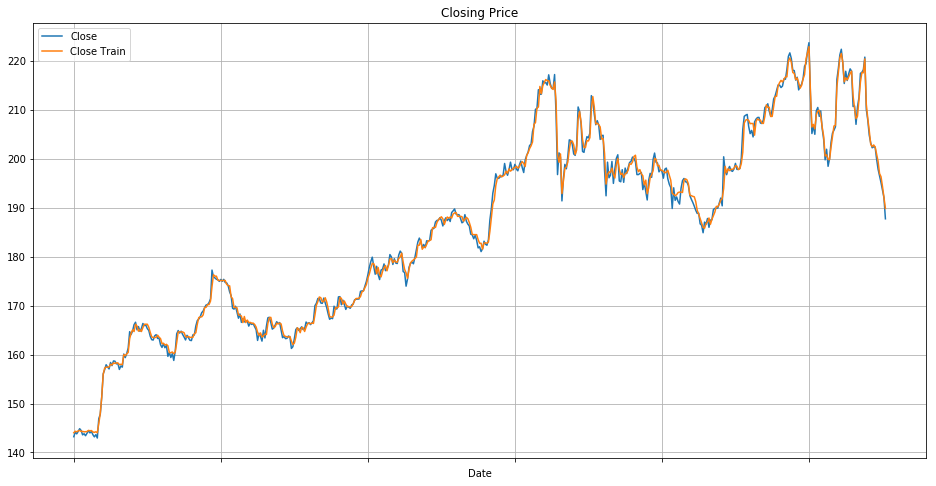

In [11]:
df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)
df_gb = df_gb.iloc[window_size:ind_split]
df_gb['Close Train'] = y_pred_train_gb[:-window_size]
df_gb.plot(label = 'BRK-B', figsize = (16, 8), title = "Closing Price", grid = True)

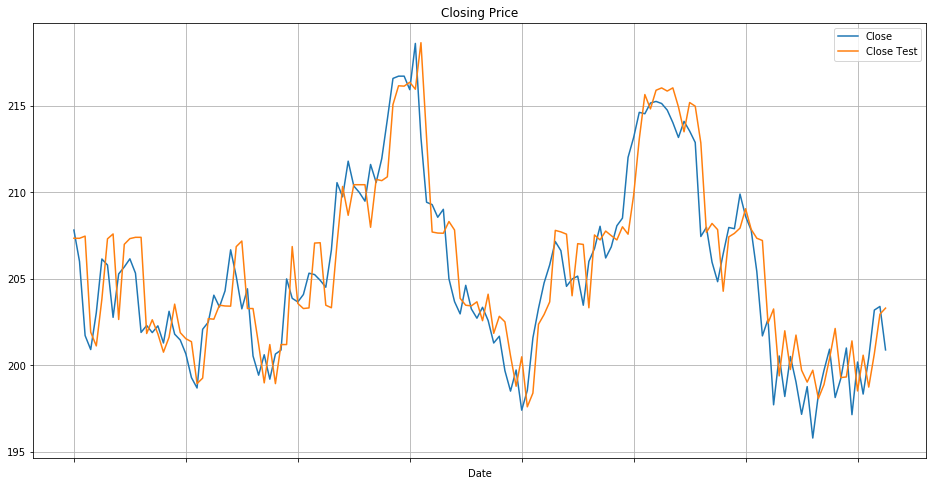

In [12]:
df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)
df_gb = df_gb.iloc[ind_split + window_size:]
df_gb['Close Test'] = y_pred_gb
df_gb.plot(label = 'BRK-B', figsize = (16, 8), title = "Closing Price", grid = True)

In [13]:
# Method Neural Networks with 1D concolutional and LSTM layers

In [14]:
keras_model = Sequential([
    Conv1D(filters = 128, kernel_size = 5, input_shape = (window_size, 1), strides = 1, padding = "causal", 
    activation = "tanh"), Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = "causal",
    activation = "tanh"),
    LSTM(128, return_sequences = True),
    LSTM(128),
    Dense(64, activation = 'tanh'),
    Dense(64, activation = 'tanh'),
    Dense(1)
])

keras_model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 27, 128)           768       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 27, 128)           82048     
_________________________________________________________________
lstm_1 (LSTM)                (None, 27, 128)           131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)             

In [15]:
lr_schedule = LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = SGD(lr = 1e-8, momentum = 0.9)
keras_model.compile(loss = Huber(), optimizer = optimizer, metrics = ["mae"])

scaler = MinMaxScaler(feature_range = (-1, 1))
data_transform = scaler.fit_transform(df['Close'].values[:, None])
data_transform = data_transform[indices]
X2 = data_transform[:,:-1]
y2 = data_transform[:, -1]
X_train_reshape = X2[:ind_split]
y_train_reshape = y2[:ind_split]
X_test_reshape = X2[ind_split:]
y_test_reshape = y2[ind_split:]

In [16]:
history = keras_model.fit(X_train_reshape, y_train_reshape, batch_size = 256, epochs = 250,
        callbacks = [lr_schedule], validation_data = (X_test_reshape, y_test_reshape))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 580 samples, validate on 146 samples
Epoch 1/250
580/580 [==============================] - 4s 6ms/step - loss: 0.1609 - mean_absolute_error: 0.4985 - val_loss: 0.2127 - val_mean_absolute_error: 0.6384
Epoch 2/250
580/580 [==============================] - 1s 2ms/step - loss: 0.1609 - mean_absolute_error: 0.4985 - val_loss: 0.2127 - val_mean_absolute_error: 0.6384
Epoch 3/250
580/580 [==============================] - 1s 2ms/step - loss: 0.1609 - mean_absolute_error: 0.4985 - val_loss: 0.2127 - val_mean_absolute_error: 0.6384
Epoch 4/250
580/580 [==============================] - 1s 2ms/step - loss: 0.1609 - mean_absolute_error: 0.4985 - val_loss: 0.2127 - val_mean_absolute_error: 0.6384
Epoch 5/250
580/580 [==============================] - 1s 2ms/step - loss: 0.1609 - mean_absolute_error: 0.4985 - val_loss: 0.2127 - val_mean_absolute_error: 0.6384
Epoch 6/250
580/580 [============

580/580 [==============================] - 1s 2ms/step - loss: 0.1607 - mean_absolute_error: 0.4981 - val_loss: 0.2122 - val_mean_absolute_error: 0.6377
Epoch 46/250
580/580 [==============================] - 1s 2ms/step - loss: 0.1606 - mean_absolute_error: 0.4981 - val_loss: 0.2121 - val_mean_absolute_error: 0.6376
Epoch 47/250
580/580 [==============================] - 1s 2ms/step - loss: 0.1606 - mean_absolute_error: 0.4980 - val_loss: 0.2121 - val_mean_absolute_error: 0.6375
Epoch 48/250
580/580 [==============================] - 1s 2ms/step - loss: 0.1606 - mean_absolute_error: 0.4980 - val_loss: 0.2120 - val_mean_absolute_error: 0.6374
Epoch 49/250
580/580 [==============================] - 1s 2ms/step - loss: 0.1605 - mean_absolute_error: 0.4979 - val_loss: 0.2119 - val_mean_absolute_error: 0.6373
Epoch 50/250
580/580 [==============================] - 1s 2ms/step - loss: 0.1605 - mean_absolute_error: 0.4978 - val_loss: 0.2118 - val_mean_absolute_error: 0.6372
Epoch 51/250
580/

580/580 [==============================] - 1s 2ms/step - loss: 0.1097 - mean_absolute_error: 0.4064 - val_loss: 0.1183 - val_mean_absolute_error: 0.4696
Epoch 95/250
580/580 [==============================] - 1s 2ms/step - loss: 0.1048 - mean_absolute_error: 0.3964 - val_loss: 0.1106 - val_mean_absolute_error: 0.4530
Epoch 96/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0997 - mean_absolute_error: 0.3858 - val_loss: 0.1025 - val_mean_absolute_error: 0.4350
Epoch 97/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0941 - mean_absolute_error: 0.3740 - val_loss: 0.0942 - val_mean_absolute_error: 0.4156
Epoch 98/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0883 - mean_absolute_error: 0.3611 - val_loss: 0.0855 - val_mean_absolute_error: 0.3944
Epoch 99/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0821 - mean_absolute_error: 0.3471 - val_loss: 0.0767 - val_mean_absolute_error: 0.3716
Epoch 100/250
580

580/580 [==============================] - 1s 2ms/step - loss: 0.0085 - mean_absolute_error: 0.1004 - val_loss: 0.0085 - val_mean_absolute_error: 0.1049
Epoch 144/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0088 - mean_absolute_error: 0.1027 - val_loss: 0.0057 - val_mean_absolute_error: 0.0888
Epoch 145/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0085 - mean_absolute_error: 0.1003 - val_loss: 0.0121 - val_mean_absolute_error: 0.1304
Epoch 146/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0096 - mean_absolute_error: 0.1088 - val_loss: 0.0048 - val_mean_absolute_error: 0.0839
Epoch 147/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0085 - mean_absolute_error: 0.1000 - val_loss: 0.0064 - val_mean_absolute_error: 0.0921
Epoch 148/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0070 - mean_absolute_error: 0.0922 - val_loss: 0.0045 - val_mean_absolute_error: 0.0793
Epoch 149/25

580/580 [==============================] - 1s 2ms/step - loss: 554.5818 - mean_absolute_error: 555.0820 - val_loss: 674.7960 - val_mean_absolute_error: 675.2960
Epoch 192/250
580/580 [==============================] - 1s 2ms/step - loss: 619.2822 - mean_absolute_error: 619.7823 - val_loss: 728.6320 - val_mean_absolute_error: 729.1321
Epoch 193/250
580/580 [==============================] - 1s 2ms/step - loss: 697.1796 - mean_absolute_error: 697.6796 - val_loss: 805.0593 - val_mean_absolute_error: 805.5592
Epoch 194/250
580/580 [==============================] - 1s 2ms/step - loss: 778.7296 - mean_absolute_error: 779.2296 - val_loss: 964.9044 - val_mean_absolute_error: 965.4045
Epoch 195/250
580/580 [==============================] - 1s 2ms/step - loss: 878.9156 - mean_absolute_error: 879.4154 - val_loss: 998.0223 - val_mean_absolute_error: 998.5223
Epoch 196/250
580/580 [==============================] - 1s 2ms/step - loss: 978.5348 - mean_absolute_error: 979.0348 - val_loss: 1230.5907

580/580 [==============================] - 1s 2ms/step - loss: 98650.9271 - mean_absolute_error: 98651.3995 - val_loss: 111458.9062 - val_mean_absolute_error: 111459.4297
Epoch 237/250
580/580 [==============================] - 1s 2ms/step - loss: 110237.8742 - mean_absolute_error: 110238.3751 - val_loss: 134383.5938 - val_mean_absolute_error: 134384.0625
Epoch 238/250
580/580 [==============================] - 1s 2ms/step - loss: 123580.8216 - mean_absolute_error: 123581.3467 - val_loss: 141550.0156 - val_mean_absolute_error: 141550.5156
Epoch 239/250
580/580 [==============================] - 1s 2ms/step - loss: 139016.1888 - mean_absolute_error: 139016.6682 - val_loss: 171763.9844 - val_mean_absolute_error: 171764.4844
Epoch 240/250
580/580 [==============================] - 1s 2ms/step - loss: 155606.1400 - mean_absolute_error: 155606.6193 - val_loss: 175265.0625 - val_mean_absolute_error: 175265.6094
Epoch 241/250
580/580 [==============================] - 1s 2ms/step - loss: 1741

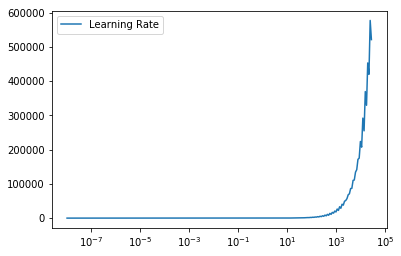

In [17]:
plt.semilogx(history.history['lr'], history.history['val_loss'])
plt.legend(['Learning Rate', 'Validation Loss'])

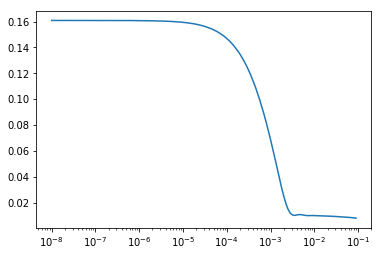

In [18]:
plt.semilogx(history.history['lr'][:140], history.history['loss'][:140])

In [19]:
keras_model = Sequential([
    Conv1D(filters = 128, kernel_size = 5, input_shape = (window_size, 1), strides = 1, padding = 'causal',
          activation = 'tanh'),
    Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = 'causal', activation = 'tanh'),
    LSTM(128, return_sequences = True),
    LSTM(128),
    Dense(64, activation = 'tanh'),
    Dense(64, activation = 'tanh'),
    Dense(1)
])

optimizer = SGD(lr = 0.1, momentum = 0.9)
keras_model.compile(loss = Huber(), optimizer = optimizer, metrics = ['mae'])
history = keras_model.fit(X_train_reshape, y_train_reshape, batch_size = 256, epochs = 250, 
                          validation_data = (X_test_reshape, y_test_reshape))

Train on 580 samples, validate on 146 samples
Epoch 1/250
580/580 [==============================] - 4s 7ms/step - loss: 0.0863 - mean_absolute_error: 0.3536 - val_loss: 0.0146 - val_mean_absolute_error: 0.1405
Epoch 2/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0272 - mean_absolute_error: 0.1864 - val_loss: 0.0086 - val_mean_absolute_error: 0.1114
Epoch 3/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0171 - mean_absolute_error: 0.1498 - val_loss: 0.0142 - val_mean_absolute_error: 0.1333
Epoch 4/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0348 - mean_absolute_error: 0.2178 - val_loss: 0.0095 - val_mean_absolute_error: 0.1111
Epoch 5/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0152 - mean_absolute_error: 0.1396 - val_loss: 0.0245 - val_mean_absolute_error: 0.1864
Epoch 6/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0166 - mean_absolute_error: 0.1424 - val_loss: 0.011

580/580 [==============================] - 1s 2ms/step - loss: 0.0054 - mean_absolute_error: 0.0779 - val_loss: 0.0040 - val_mean_absolute_error: 0.0724
Epoch 51/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0056 - mean_absolute_error: 0.0786 - val_loss: 0.0036 - val_mean_absolute_error: 0.0699
Epoch 52/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0053 - mean_absolute_error: 0.0756 - val_loss: 0.0035 - val_mean_absolute_error: 0.0683
Epoch 53/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0053 - mean_absolute_error: 0.0783 - val_loss: 0.0035 - val_mean_absolute_error: 0.0695
Epoch 54/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0052 - mean_absolute_error: 0.0752 - val_loss: 0.0035 - val_mean_absolute_error: 0.0685
Epoch 55/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0052 - mean_absolute_error: 0.0751 - val_loss: 0.0039 - val_mean_absolute_error: 0.0717
Epoch 56/250
580/

580/580 [==============================] - 1s 2ms/step - loss: 0.0043 - mean_absolute_error: 0.0670 - val_loss: 0.0032 - val_mean_absolute_error: 0.0635
Epoch 100/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0042 - mean_absolute_error: 0.0698 - val_loss: 0.0028 - val_mean_absolute_error: 0.0609
Epoch 101/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0040 - mean_absolute_error: 0.0653 - val_loss: 0.0030 - val_mean_absolute_error: 0.0616
Epoch 102/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0039 - mean_absolute_error: 0.0667 - val_loss: 0.0032 - val_mean_absolute_error: 0.0656
Epoch 103/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0040 - mean_absolute_error: 0.0651 - val_loss: 0.0028 - val_mean_absolute_error: 0.0603
Epoch 104/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0039 - mean_absolute_error: 0.0668 - val_loss: 0.0027 - val_mean_absolute_error: 0.0593
Epoch 105/25

580/580 [==============================] - 1s 2ms/step - loss: 0.0034 - mean_absolute_error: 0.0599 - val_loss: 0.0025 - val_mean_absolute_error: 0.0559
Epoch 149/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0035 - mean_absolute_error: 0.0621 - val_loss: 0.0025 - val_mean_absolute_error: 0.0578
Epoch 150/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0038 - mean_absolute_error: 0.0642 - val_loss: 0.0027 - val_mean_absolute_error: 0.0586
Epoch 151/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0036 - mean_absolute_error: 0.0648 - val_loss: 0.0027 - val_mean_absolute_error: 0.0606
Epoch 152/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0036 - mean_absolute_error: 0.0617 - val_loss: 0.0040 - val_mean_absolute_error: 0.0733
Epoch 153/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0038 - mean_absolute_error: 0.0654 - val_loss: 0.0039 - val_mean_absolute_error: 0.0719
Epoch 154/25

580/580 [==============================] - 1s 2ms/step - loss: 0.0041 - mean_absolute_error: 0.0684 - val_loss: 0.0049 - val_mean_absolute_error: 0.0837
Epoch 198/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0041 - mean_absolute_error: 0.0694 - val_loss: 0.0048 - val_mean_absolute_error: 0.0820
Epoch 199/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0041 - mean_absolute_error: 0.0692 - val_loss: 0.0035 - val_mean_absolute_error: 0.0690
Epoch 200/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0037 - mean_absolute_error: 0.0654 - val_loss: 0.0037 - val_mean_absolute_error: 0.0708
Epoch 201/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0040 - mean_absolute_error: 0.0714 - val_loss: 0.0039 - val_mean_absolute_error: 0.0730
Epoch 202/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0041 - mean_absolute_error: 0.0710 - val_loss: 0.0048 - val_mean_absolute_error: 0.0812
Epoch 203/25

580/580 [==============================] - 1s 2ms/step - loss: 0.0027 - mean_absolute_error: 0.0519 - val_loss: 0.0017 - val_mean_absolute_error: 0.0471
Epoch 247/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0026 - mean_absolute_error: 0.0505 - val_loss: 0.0018 - val_mean_absolute_error: 0.0477
Epoch 248/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0026 - mean_absolute_error: 0.0517 - val_loss: 0.0018 - val_mean_absolute_error: 0.0482
Epoch 249/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0025 - mean_absolute_error: 0.0493 - val_loss: 0.0022 - val_mean_absolute_error: 0.0533
Epoch 250/250
580/580 [==============================] - 1s 2ms/step - loss: 0.0026 - mean_absolute_error: 0.0505 - val_loss: 0.0020 - val_mean_absolute_error: 0.0514


In [20]:
y_pred_train_keras = scaler.inverse_transform(keras_model.predict(X_train_reshape, batch_size = 256))
y_pred_keras = scaler.inverse_transform(keras_model.predict(X_test_reshape, batch_size = 256))

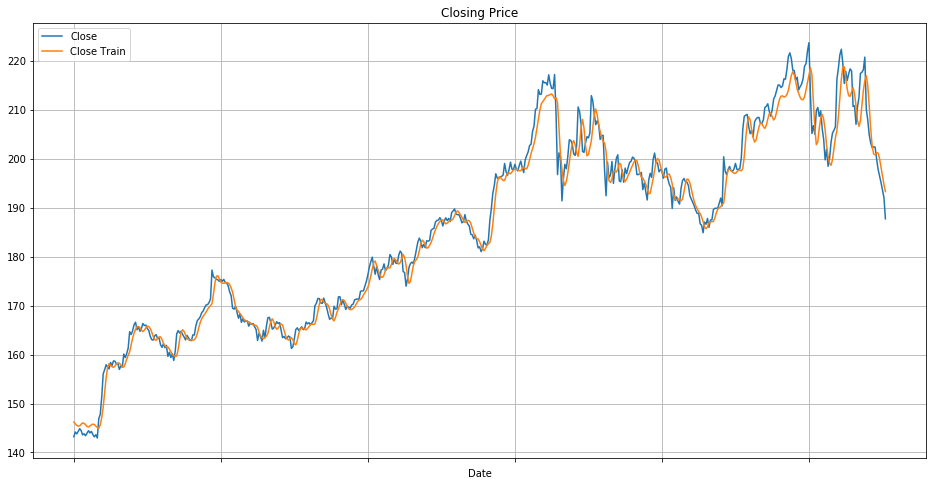

In [21]:
df_keras = df.copy()
df_keras.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)
df_keras = df_keras.iloc[window_size:ind_split]
df_keras['Close Train'] = y_pred_train_keras[:-window_size]
df_keras.plot(label = "BRK-B", figsize = (16, 8), title = "Closing Price", grid = True)

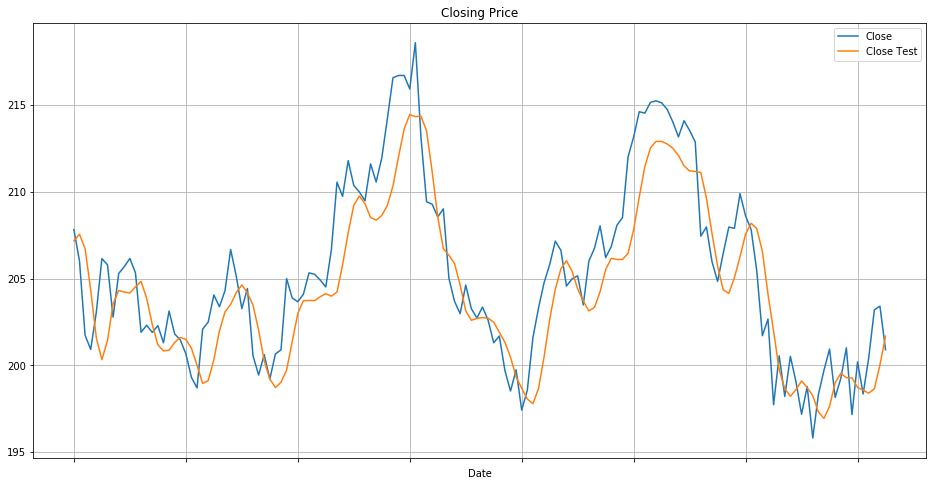

In [24]:
df_keras = df.copy()
df_keras.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)
df_keras = df_keras.iloc[ind_split + window_size:]
df_keras['Close Test'] = y_pred_keras
df_keras.plot(label = 'TSLA', figsize = (16, 8), title = 'Closing Price', grid = True)

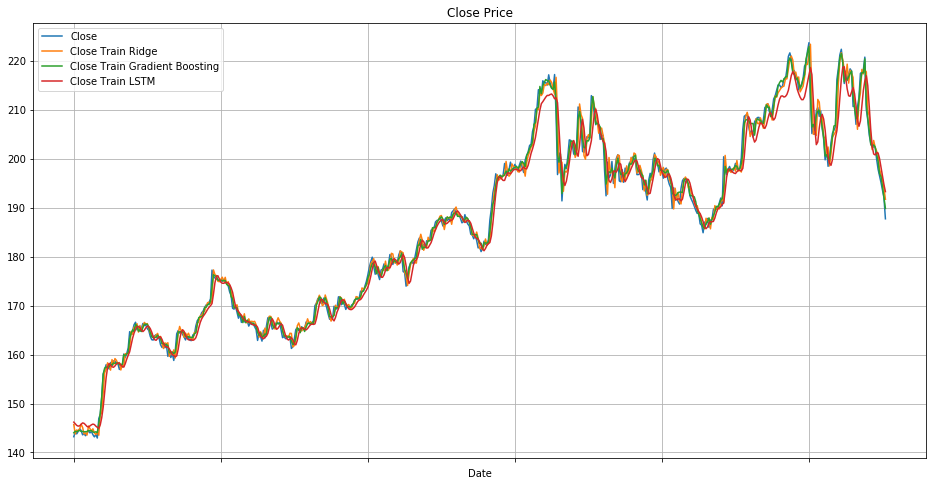

In [26]:
df_train = df.copy()
df_train.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)
df_train = df_train.iloc[window_size:ind_split]

df_train['Close Train Ridge'] = y_pred_train_ridge[:-window_size]
df_train['Close Train Gradient Boosting'] = y_pred_train_gb[:-window_size]
df_train['Close Train LSTM'] = y_pred_train_keras[:-window_size]

df_train.plot(label = 'BRK-B', figsize = (16, 8), title = 'Close Price', grid = True)

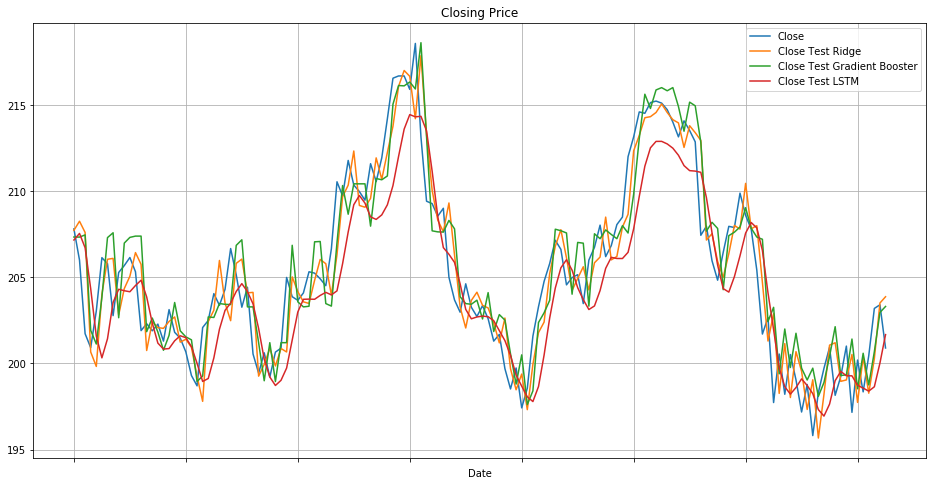

In [27]:
df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)
df_test = df_test.iloc[ind_split + window_size:]

df_test['Close Test Ridge'] = y_pred_ridge
df_test['Close Test Gradient Booster'] = y_pred_gb
df_test['Close Test LSTM'] = y_pred_keras

df_test.plot(label = "BRK_B", figsize = (16, 8), title = 'Closing Price', grid = True)

In [ ]:
# Okay - now let's see what this can do...

In [28]:
num_days = 5

data_seed = df['Close'].values[-window_size:][None]

data_seed_norm = scaler.transform(data_seed)
input_values = {"ridge": data_seed, "gb": data_seed, "keras": data_seed_norm.copy()}
values = {"ridge": [], "gb": [], "keras": []}

for i in range(num_days):
    values["ridge"].append(ridge_model.predict(input_values["ridge"])[0])
    values["gb"].append(gb_model.predict(input_values["gb"])[0])
    values["keras"].append(keras_model.predict(input_values["keras"][...,None])[0][0])
    
    for v in input_values:
        val = input_values[v]
        val = np.insert(val, -1, values[v][-1], axis = 1)
        val = np.delete(val, 0, axis = 1)
        input_values[v] = val.copy()
        
for v in input_values:
    values[v] = np.array(values[v])
    
values["keras"] = scaler.inverse_transform(values["keras"][None])[0]

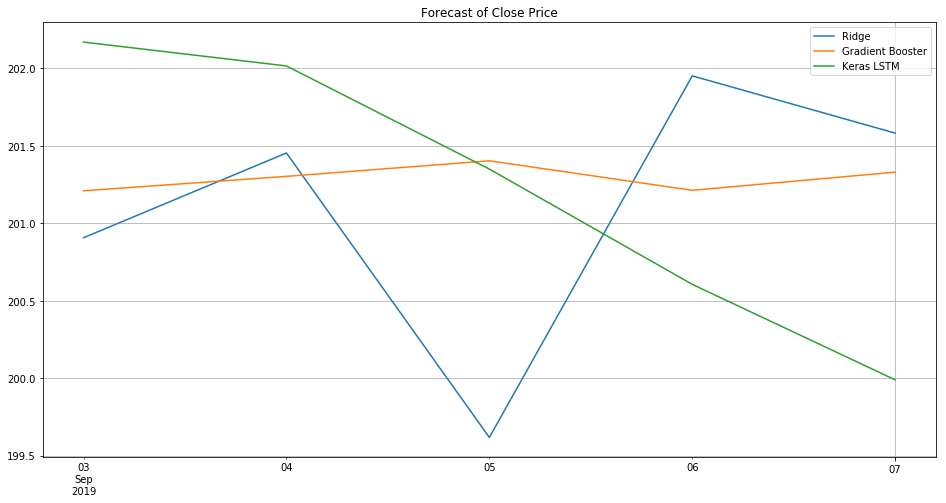

In [31]:
from datetime import timedelta, datetime
last_date = datetime.strptime(df.index[-1], '%Y-%m-%d')
df_forecast = pd.DataFrame()
df_forecast["Ridge"] = values["ridge"]
df_forecast["Gradient Booster"] = values["gb"]
df_forecast["Keras LSTM"] = values["keras"]
df_forecast.index = pd.date_range(start = last_date, periods = num_days)
df_forecast.plot(label = "BRK-B", figsize = (16, 8), title = 'Forecast of Close Price', grid = True)

In [ ]:
# Haha - those are very, very different - back to the drawing board...

In [32]:
# End Code